# Stochastic Calculus Problem Set 2 Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Pre-Question

_How does the SDE tell you that the Hull-White interest rate is not a martingale?_

Because it has a $dt$ term.

## Part (a)

### Hull-White

Here, we have $$ \beta(u, x) = a_t - b_t R_t^{HW} $$ and $$ \gamma(u, x) = \sigma_t $$

Thus, $$ g_t(t, x) + (a_t - b_t R_t^{HW}) g_x(t, x) + \frac{1}{2} \sigma_t^2 g_{xx}(t, x) = 0 $$

### Cox-Ingersol-Ross

Here, we have $$ \beta(u, x) = a_t + b_t R_t^{CIR} $$ and $$ \gamma(u, x) = \sigma \sqrt{R_t^{CIR}} $$

Thus, $$ g_t(t, x) + (a_t - b_t R_t^{CIR}) g_x(t, x) + \frac{1}{2} \sigma^2 R_t^{CIR} g_{xx}(t, x) = 0 $$


## Part (b)

In [2]:
epsilon = 0.01  # Keep interest rate bounded away from 0

delta = 0.01  # Time step
T = 500  # Roughly 2 years
K_a = 0.01
K_b = 0.005
K_sigma = 0.05

t = np.arange(0, T)
b = K_b * (1.1 + np.sin(np.pi*t / T))
sigma = K_sigma * (1.1 + np.cos(4*np.pi*t / T))
a = 0.5 * sigma**2 + K_a * (1.1 + np.cos(np.pi*t / T))

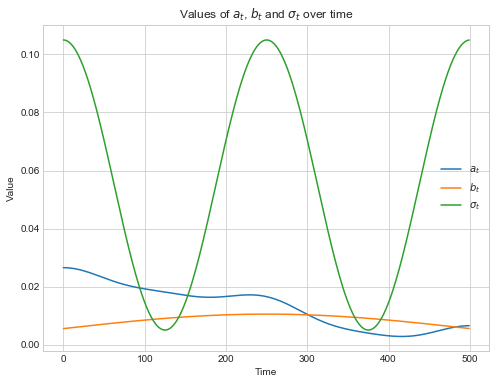

In [3]:
fig, ax = plt.subplots(figsize=[8, 6])
ax.plot(a, label='$a_t$')
ax.plot(b, label='$b_t$')
ax.plot(sigma, label='$\sigma_t$')
ax.set_title('Values of $a_t$, $b_t$ and $\sigma_t$ over time')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend();

### Sub-Part 1

In [4]:
# Hull-White
R_HW = np.ones(shape=[T, 10])

for idx, row in enumerate(R_HW[1:]):
    if (row < epsilon).any():
        print('Exception occured at iteration {}'.format(idx))
        row[row < epsilon] = epsilon

    dR = (a[idx] - b[idx] * R_HW[idx]) + sigma[idx] * np.random.randn()
    R_HW[idx + 1] = row + dR

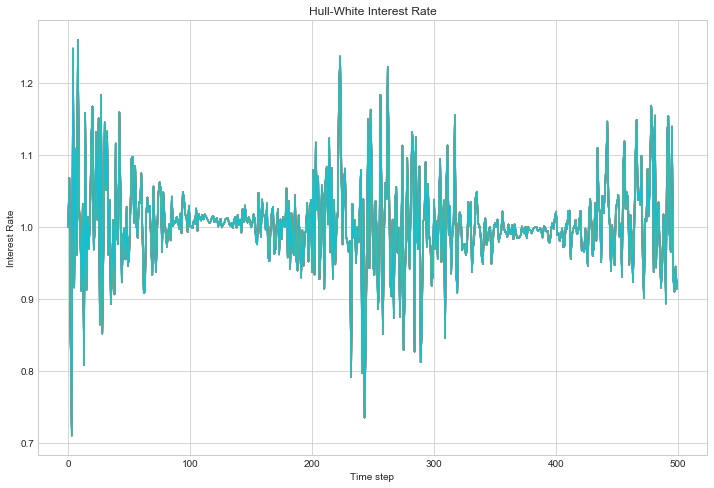

In [5]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(R_HW)
ax.set_title('Hull-White Interest Rate')
ax.set_xlabel('Time step')
ax.set_ylabel('Interest Rate');

In [6]:
# Cox-Ingersoll-Ross
R_CIR = np.ones(shape=[T, 10])

for idx, row in enumerate(R_CIR[1:]):
    if (row < epsilon).any():
        print('Exception occured at iteration {}'.format(idx))
        row[row < epsilon] = epsilon

    dR = (a[idx] - b[idx] * R_CIR[idx]) + sigma[idx] * np.sqrt(R_CIR[idx]) * np.random.randn()
    R_CIR[idx + 1] = row + dR

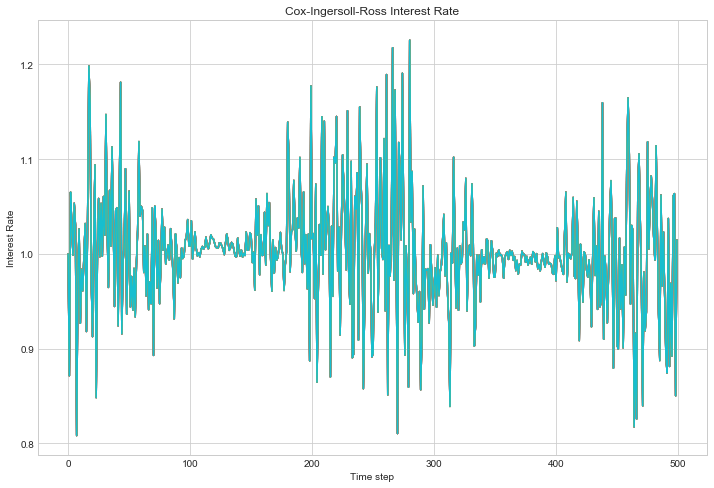

In [7]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(R_CIR)
ax.set_title('Cox-Ingersoll-Ross Interest Rate')
ax.set_xlabel('Time step')
ax.set_ylabel('Interest Rate');

### Sub-Part 2

Using WolframAlpha, we have that

$$ c(t) = \int_0^t K_b (1.1 + \sin(\frac{\pi t}{T})) du = K_b (1.1 t - \frac{T}{\pi} cos(\frac{\pi t}{T}))$$

Thus,

$$ \int_0^T \exp[-a(u) (c(T) - c(0))] du = \int_0^T \exp[- 1.1 K_b T (\frac{1}{2} (K_\sigma (1.1 + \cos(4\pi t / T)))^2 + K_a(1.1 + \cos(\frac{\pi t}{T}))) ] du $$

This integral does not appear to have a closed-form solution. Let us call it $I(T)$.

Finally, the integrand of the last integral is 

$$ \exp[-2(c(T) - c(u))] \sigma(u) = \exp[-2(K_b (1.1 T + \frac{T}{\pi} - 1.1 u + \frac{T}{\pi} cos(\frac{\pi u}{T})))] (K_\sigma (1.1 + \cos(4 \pi t / T))) $$

$$ = \exp[-2 (1.41831 T - 1.1 u + (T cos((\pi u)/T))/\pi) K_b] (1.1 + cos((4 \pi t)/T)) K_\sigma $$

So, all told, the Hull-White interest rate is

$$ R(T) = r \exp[- 1.1 K_b T] + I(T) +\int_0^T \exp[-2 (1.41831 T - 1.1 u + (T cos((\pi u)/T))/\pi) K_b] (1.1 + cos((4 \pi t)/T)) K_\sigma du $$

## Part (c)

In [8]:
# Hull-White
R_HW = np.ones(shape=[T, 1000])

for idx, row in enumerate(R_HW[1:]):
    if (row < epsilon).any():
        print('Exception occured at iteration {}'.format(idx))
        row[row < epsilon] = epsilon

    dR = (a[idx] - b[idx] * R_HW[idx]) + sigma[idx] * np.random.randn()
    R_HW[idx + 1] = row + dR

In [9]:
# Cox-Ingersoll-Ross
R_CIR = np.ones(shape=[T, 1000])

for idx, row in enumerate(R_CIR[1:]):
    if (row < epsilon).any():
        print('Exception occured at iteration {}'.format(idx))
        row[row < epsilon] = epsilon

    dR = (a[idx] - b[idx] * R_CIR[idx]) + sigma[idx] * np.sqrt(R_CIR[idx]) * np.random.randn()
    R_CIR[idx + 1] = row + dR

In [10]:
R_HW_mean = np.mean(R_HW, axis=1)
R_CIR_mean = np.mean(R_CIR, axis=1)
R_HW_var = np.var(R_HW, axis=1)
R_CIR_var = np.var(R_CIR, axis=1)

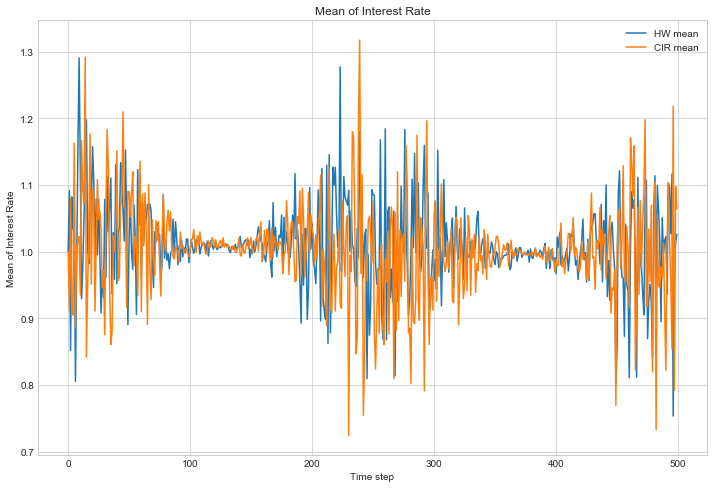

In [11]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(R_HW_mean, label='HW mean')
ax.plot(R_CIR_mean, label='CIR mean')
ax.set_title('Mean of Interest Rate')
ax.set_xlabel('Time step')
ax.set_ylabel('Mean of Interest Rate')
ax.legend();

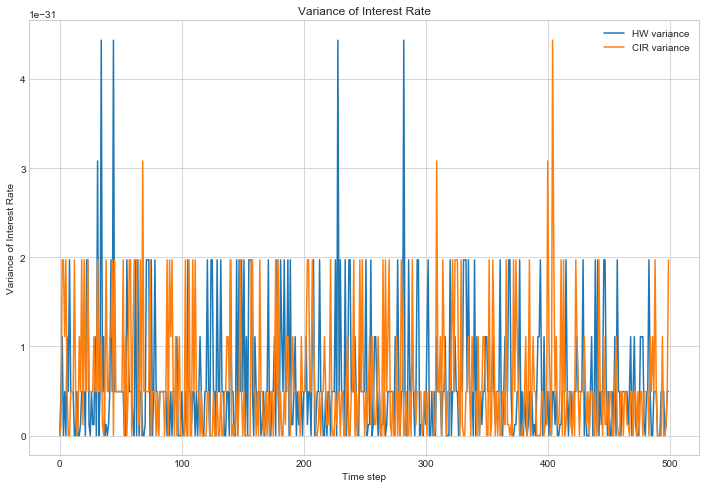

In [12]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(R_HW_var, label='HW variance')
ax.plot(R_CIR_var, label='CIR variance')
ax.set_title('Variance of Interest Rate')
ax.set_xlabel('Time step')
ax.set_ylabel('Variance of Interest Rate')
ax.legend();

## Part (d)

The exception does not occur at all.